In [11]:
from social_network import SocialNetwork
from logic_matrix import LogicMatrix
from init_belief import InitialBelief

import numpy as np
import matplotlib.pyplot as plt

# Belief Setup
## # Global Parms

In [ ]:

AGENT_NUM = 1000
TOPIC_NUM = 3
SEED = 1942340
T = 20

## W matrix

In [ ]:
W = SocialNetwork(
    n=AGENT_NUM,
    random_beta=True,
    seed=SEED
).generate()

W_matrix = W.W
W.describe()
W.plot_hist()

## C tensor

In [ ]:
C = LogicMatrix(
    n=AGENT_NUM,
    m=TOPIC_NUM,
    random_beta=True,
    seed=SEED
).generate()
C_base = C.C_base
C_tensor = np.array(C.C_list)   # shape: (n, m, m)
print(f'Base Logic Matrix:\n{C_base}')

## X0 vectors


=== Social Network Summary ===
Nodes (n): 1000
Directed: True
Model: RR
Beta(α,β): (4.125, 4.998)
Matrix shape: (1000, 1000)
Density (non-zero ratio): 0.035
Average row sum: 1.000
Average degree: 5.000
Average clustering: 0.002
Spectral radius (ρ): 1.000000
Second largest eigenvalue: 0.738057
Stability: Semi-stable (row-stochastic)
Random seed: 1942340



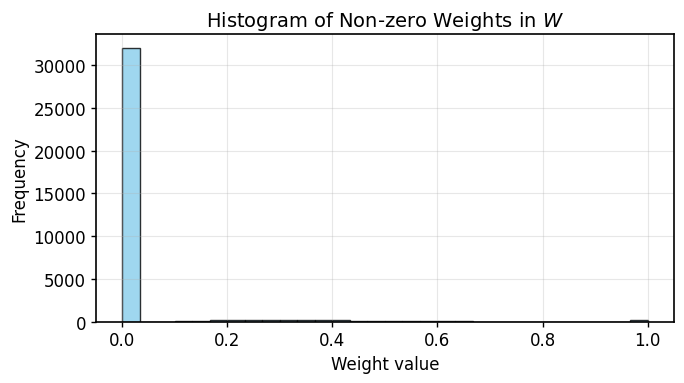

Base Logic Matrix:
[[ 1.          0.          0.        ]
 [ 0.44028457  0.55971543  0.        ]
 [ 0.22257151 -0.18201515  0.59541334]]


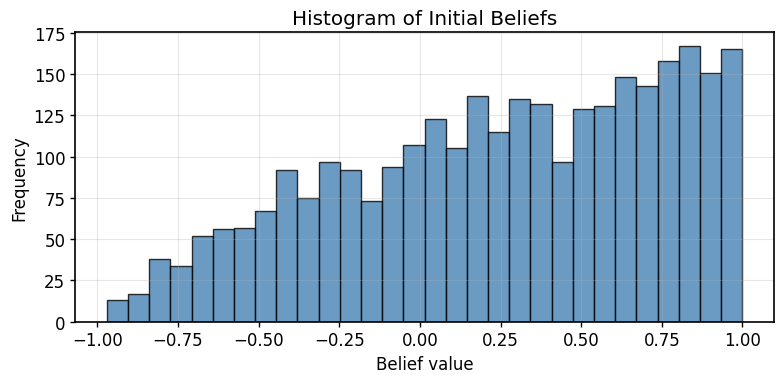

In [ ]:
X0 = InitialBelief(
    n=AGENT_NUM,
    m=TOPIC_NUM,
    mode="uniform",
    seed=SEED
).generate()

X0.plot_hist()
X0_vector = X0.X0


# Simulation iteration

In [13]:
def simulate(W, C, X0, T=30):
    """
    Simulate belief dynamics following:
        x_i(t+1) = C_i * (sum_j w_ij x_j(t))
    """
    X = X0.copy()
    traj = [X]

    for t in range(T):
        influence = W @ X              # shape (n, m)

        X_next = np.einsum("nij,nj->ni", C, influence)

        traj.append(X_next)
        X = X_next

    return np.array(traj)

def plot_trajectories(trajectory, m):
    n = trajectory.shape[1]
    time_axis = np.arange(trajectory.shape[0])

    plt.rcParams.update({
        "font.size": 12,
        "axes.linewidth": 1.2,
        "xtick.major.width": 1,
        "ytick.major.width": 1
    })

    fig, axes = plt.subplots(m, 1, figsize=(10, 15), sharex=True)

    if m == 1:
        axes = [axes]

    for topic in range(m):
        ax = axes[topic]

        for agent in range(n):
            ax.plot(time_axis,
                    trajectory[:, agent, topic],
                    lw=1,
                    alpha=0.85)

        ax.set_ylim(-1, 1)
        ax.set_yticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax.grid(True, linestyle='-', alpha=0.25, color='gray')
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_title(f"Topic {topic+1}", fontsize=14, pad=10)
        ax.set_ylabel("Belief Dynamics", fontsize=12)

    axes[-1].set_xlabel("Periods")
    axes[-1].set_xlim(0, len(time_axis)-1)
    axes[-1].set_xticks(np.arange(0, len(time_axis), 2))

    plt.tight_layout()
    plt.show()

In [14]:

trajectory = simulate(W_matrix, C_tensor, X0_vector, T=T)
print(f"Simulation complete: trajectory shape = {trajectory.shape}")

Simulation complete: trajectory shape = (21, 1000, 3)


# Output

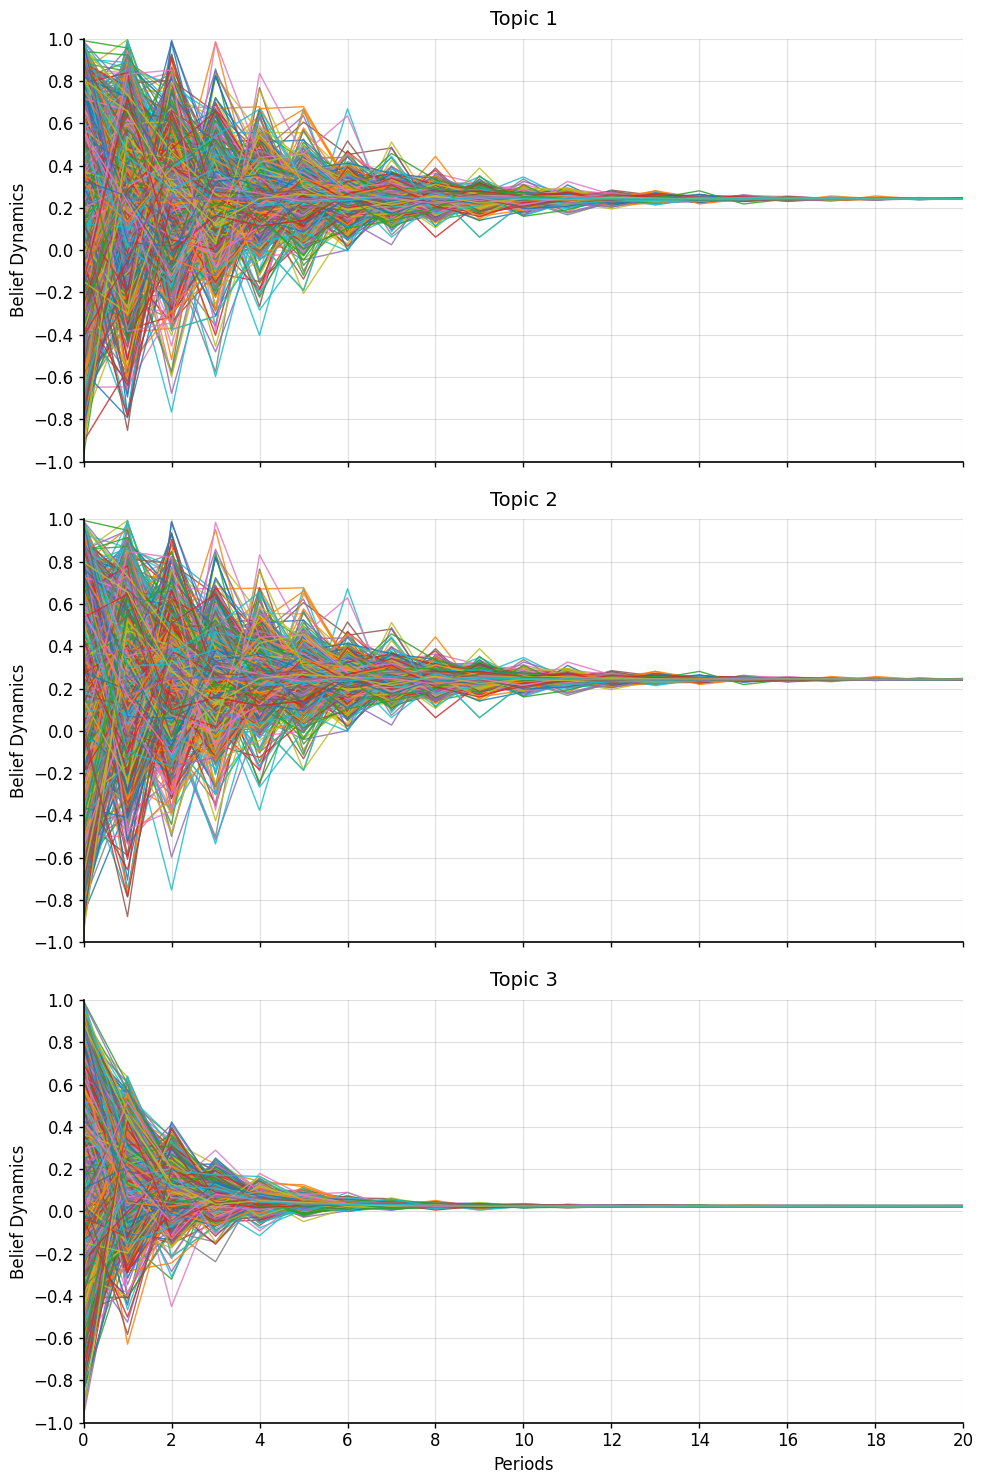

In [15]:
plot_trajectories(trajectory, m=TOPIC_NUM)